In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('RentedBikes.csv')
df.head()

,Date,Season,Year,Month,Hour,holiday,Day of the week,Working Day,Weather Condition,Temperature,Humidity,Wind Speed,Casual Users,Subscribed Users,Total Number of Rented Bikes
0,1/1/2011,Winter,2011,January,0,0,6,0,Clear,0.24,0.81,0.0,3,13,16
1,1/1/2011,Winter,2011,January,1,0,6,0,Clear,0.22,0.80,0.0,8,32,40
2,1/1/2011,Winter,2011,January,2,0,6,0,Clear,0.22,0.80,0.0,5,27,32
3,1/1/2011,Winter,2011,January,3,0,6,0,Clear,0.24,0.75,0.0,3,10,13
4,1/1/2011,Winter,2011,January,4,0,6,0,Clear,0.24,0.75,0.0,0,1,1


In [5]:
df.shape

(17379, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          17379 non-null  object 
 1   Season                        17379 non-null  object 
 2   Year                          17379 non-null  int64  
 3   Month                         17379 non-null  object 
 4   Hour                          17379 non-null  int64  
 5   holiday                       17379 non-null  int64  
 6   Day of the week               17379 non-null  int64  
 7   Working Day                   17379 non-null  int64  
 8   Weather Condition             17379 non-null  object 
 9   Temperature                   17379 non-null  float64
 10  Humidity                      17379 non-null  float64
 11  Wind Speed                    17379 non-null  float64
 12  Casual Users                  17379 non-null  int64  
 13  S

In [7]:
df.describe()

,Year,Hour,holiday,Day of the week,Working Day,Temperature,Humidity,Wind Speed,Casual Users,Subscribed Users,Total Number of Rented Bikes
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2011.502561,11.546752,0.028770,3.003683,0.682721,0.496987,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.500008,6.914405,0.167165,2.005771,0.465431,0.192556,0.192930,0.122340,49.305030,151.357286,181.387599
min,2011.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011.000000,6.000000,0.000000,1.000000,0.000000,0.340000,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012.000000,12.000000,0.000000,3.000000,1.000000,0.500000,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012.000000,18.000000,0.000000,5.000000,1.000000,0.660000,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012.000000,23.000000,1.000000,6.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
df.isnull().sum()

#There are no null values

Date                            0
Season                          0
Year                            0
Month                           0
Hour                            0
holiday                         0
Day of the week                 0
Working Day                     0
Weather Condition               0
Temperature                     0
Humidity                        0
Wind Speed                      0
Casual Users                    0
Subscribed Users                0
Total Number of Rented Bikes    0
dtype: int64

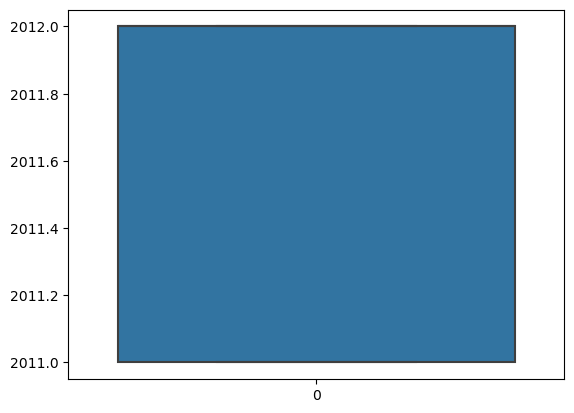

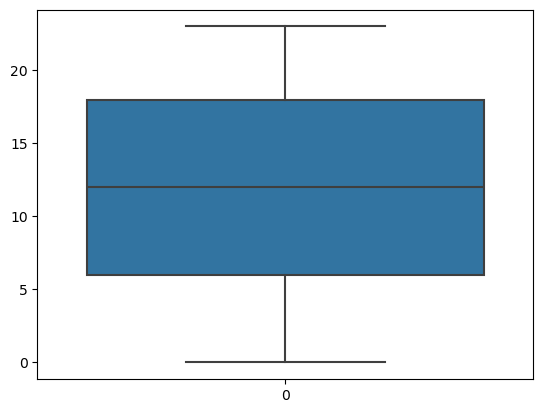

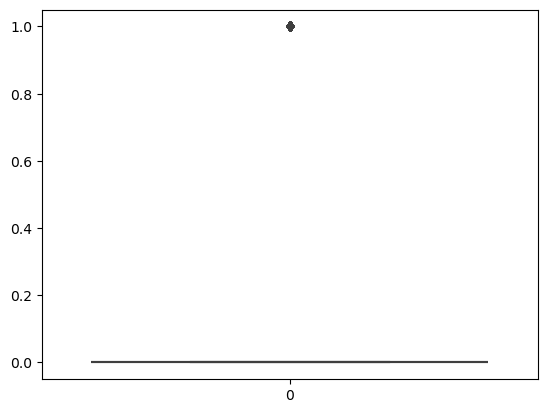

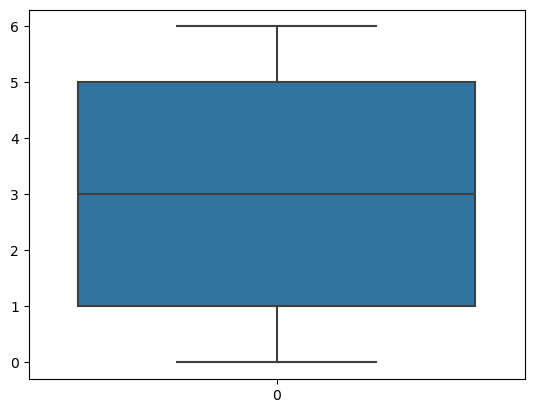

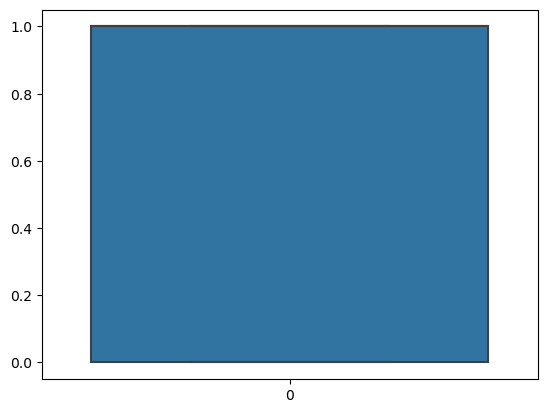

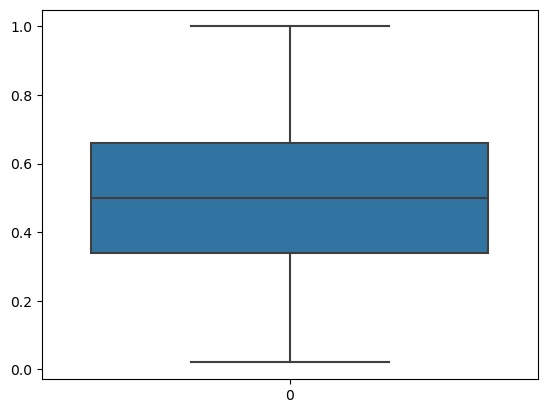

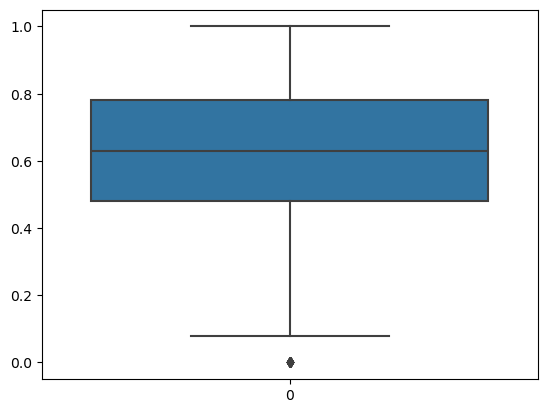

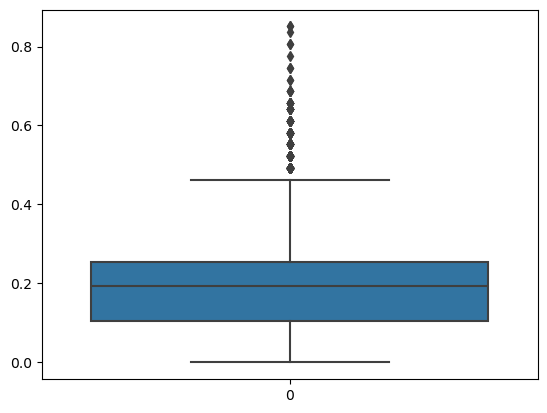

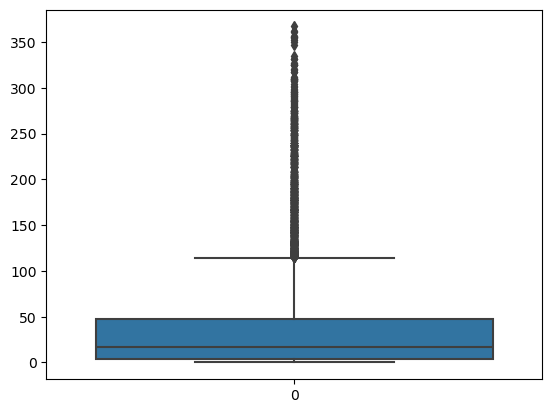

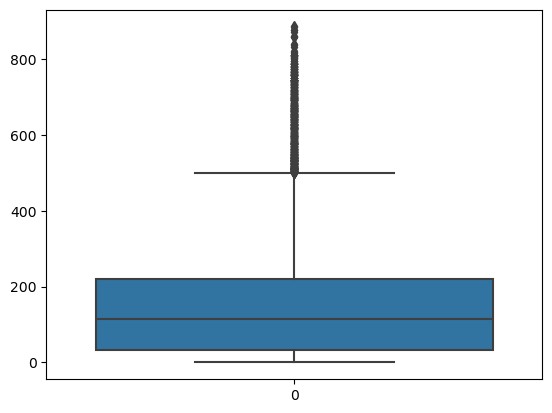

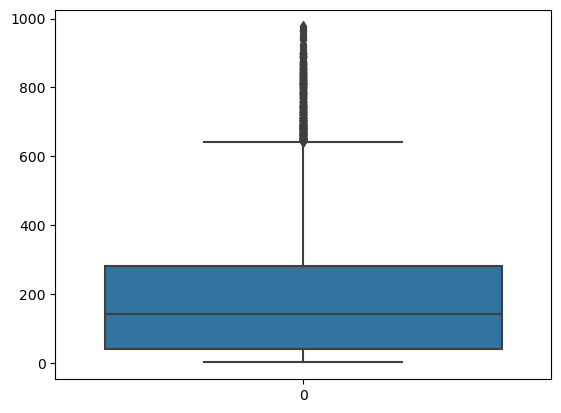

In [9]:
#detecting outliers
for i in df.select_dtypes(include='number'):
    sns.boxplot(df[i])
    plt.show()

In [10]:
df.head()

,Date,Season,Year,Month,Hour,holiday,Day of the week,Working Day,Weather Condition,Temperature,Humidity,Wind Speed,Casual Users,Subscribed Users,Total Number of Rented Bikes
0,1/1/2011,Winter,2011,January,0,0,6,0,Clear,0.24,0.81,0.0,3,13,16
1,1/1/2011,Winter,2011,January,1,0,6,0,Clear,0.22,0.80,0.0,8,32,40
2,1/1/2011,Winter,2011,January,2,0,6,0,Clear,0.22,0.80,0.0,5,27,32
3,1/1/2011,Winter,2011,January,3,0,6,0,Clear,0.24,0.75,0.0,3,10,13
4,1/1/2011,Winter,2011,January,4,0,6,0,Clear,0.24,0.75,0.0,0,1,1


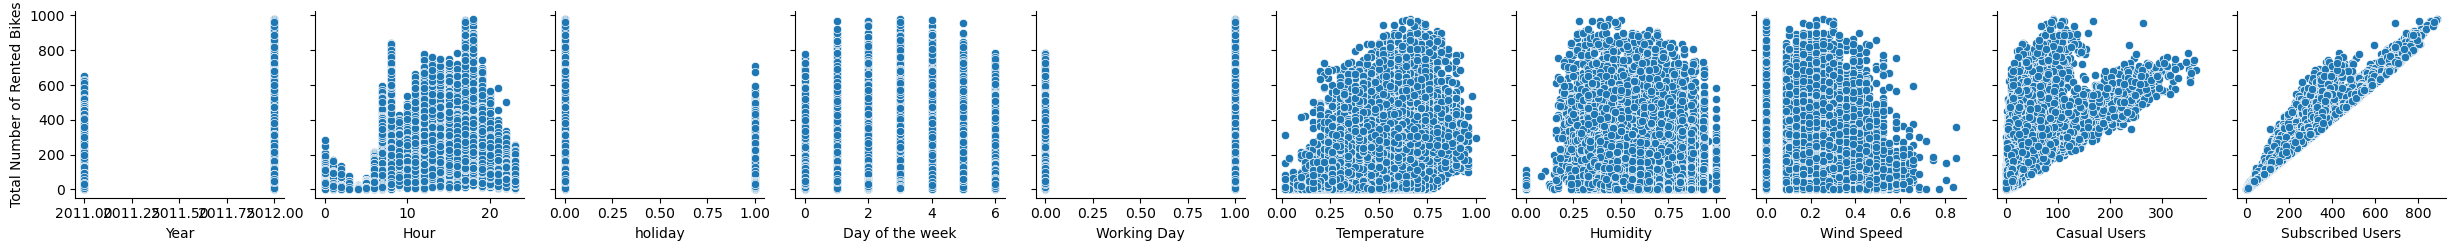

In [14]:
sns.pairplot(df,x_vars=['Year','Hour','holiday','Day of the week','Working Day','Temperature','Humidity','Wind Speed','Casual Users','Subscribed Users'],y_vars='Total Number of Rented Bikes',kind='scatter')
plt.show()

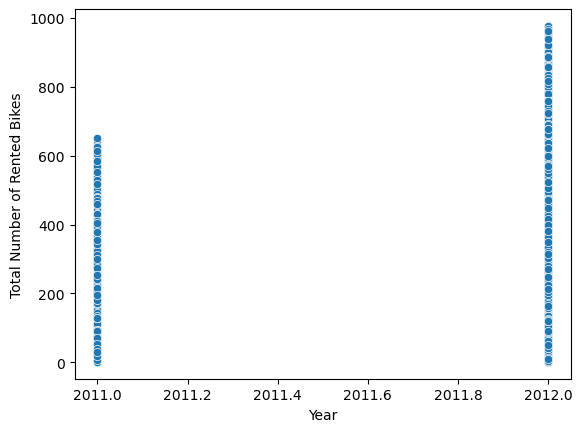

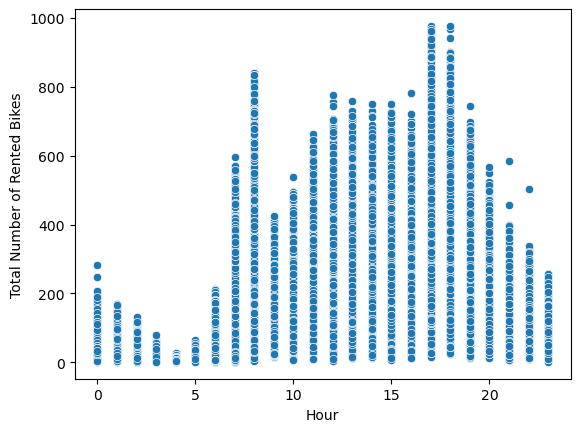

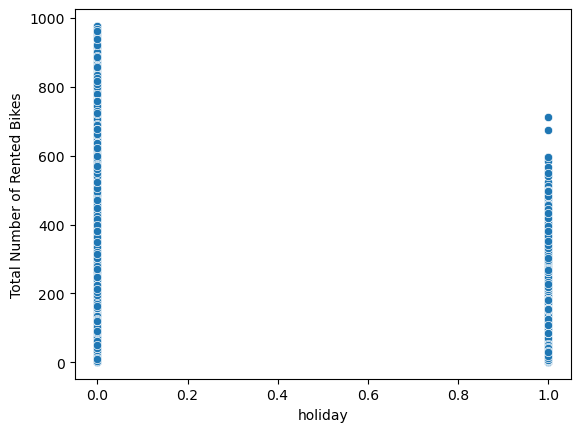

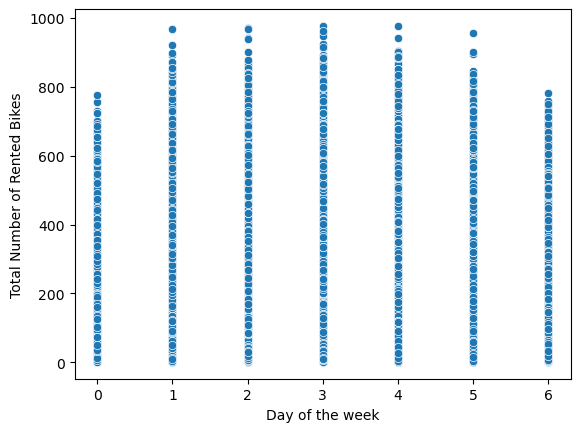

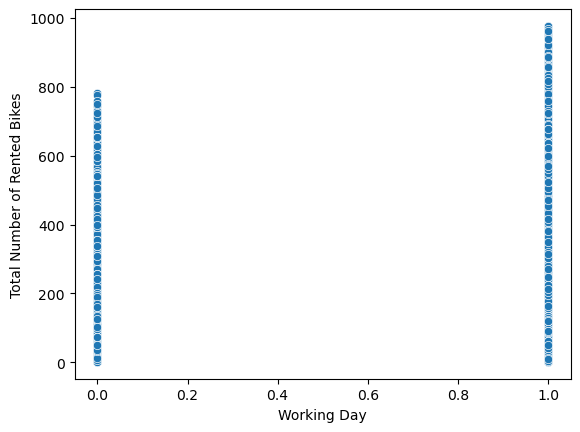

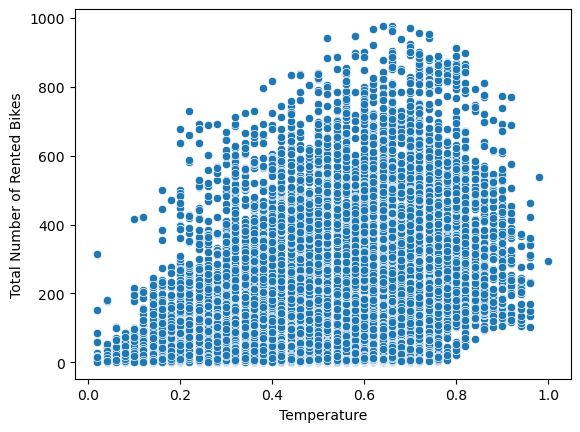

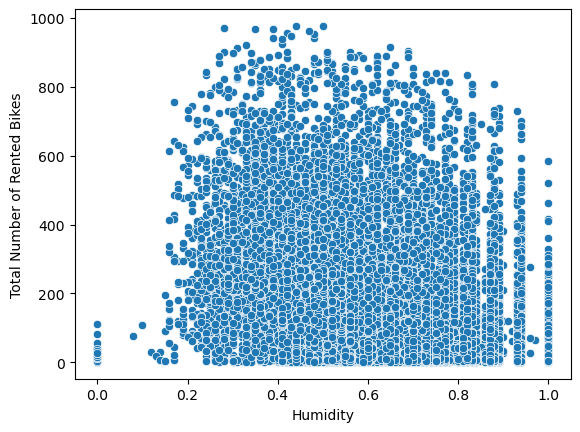

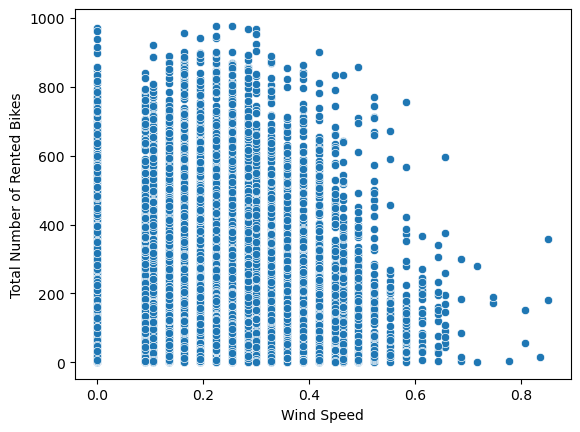

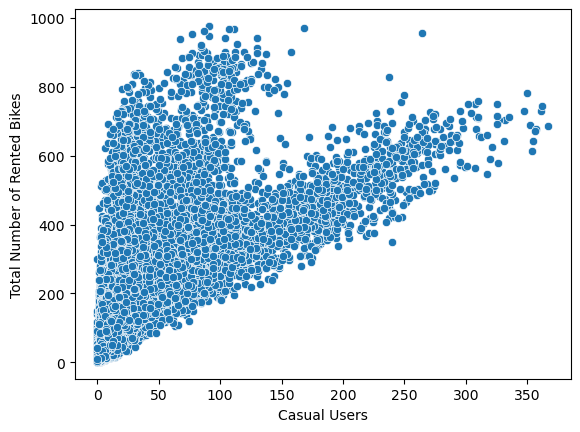

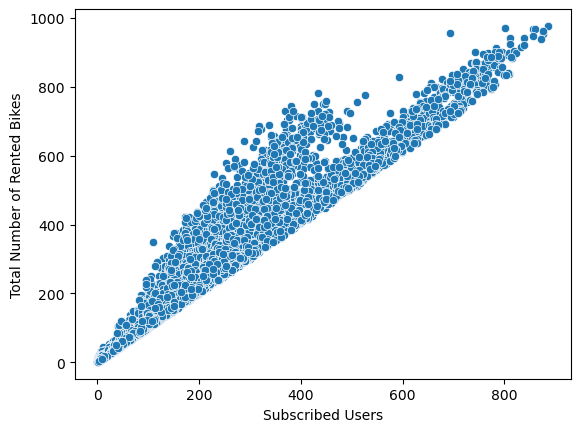

In [16]:
x_vars=['Year','Hour','holiday','Day of the week','Working Day','Temperature','Humidity','Wind Speed','Casual Users','Subscribed Users']

for i in x_vars:
    sns.scatterplot(x=df[i],y=df['Total Number of Rented Bikes'])
    plt.show()

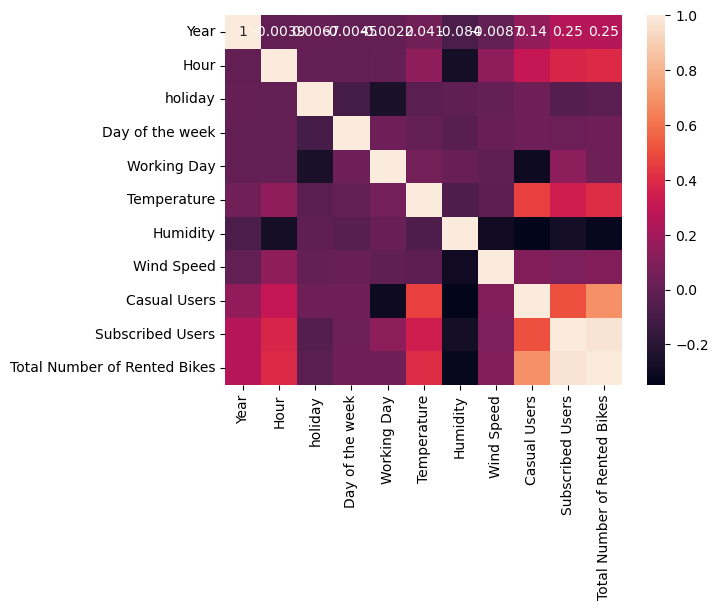

In [20]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)
plt.show()

In [22]:
X=df['Subscribed Users']
y=df['Total Number of Rented Bikes']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size = 0.7, test_size = 0.3,random_state = 100)
X_train.head()

8364      4
643      10
9518    124
7233     28
7443    185
Name: Subscribed Users, dtype: int64

In [26]:
y_train.head()

8364      4
643      11
9518    141
7233     31
7443    208
Name: Total Number of Rented Bikes, dtype: int64

In [28]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
X_train_sm

,const,Subscribed Users
8364,1.0,4
643,1.0,10
9518,1.0,124
7233,1.0,28
7443,1.0,185
...,...,...
16304,1.0,41
79,1.0,50
12119,1.0,6
14147,1.0,372


In [30]:
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params
#here 10.484955 is the intercept, and 1.166752 is a slope.

const               10.484955
Subscribed Users     1.166752
dtype: float64

In [32]:
lr.summary()

#The coefficient for Subscribed Users is 1.1668, and P value is very low
#R-squared is 0.943 meaning it is 94.3%, this is a decent T-squared value.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Total Number of Rented Bikes   R-squared:                       0.943
Model:                                      OLS   Adj. R-squared:                  0.943
Method:                           Least Squares   F-statistic:                 2.029e+05
Date:                          Thu, 25 Jul 2024   Prob (F-statistic):               0.00
Time:                                  22:46:40   Log-Likelihood:                -63066.
No. Observations:                         12165   AIC:                         1.261e+05
Df Residuals:                             12163   BIC:                         1.262e+05
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.4850      0.559     18.741      0.000       9.388      11.582
Subscribed Users     1.1668      0.003    450.405      0.000       1.162       1.172
==============================================================================
Omnibus:                     6250.417   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48719.217
Skew:                           2.361   Prob(JB):                         0.00
Kurtosis:                      11.592   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

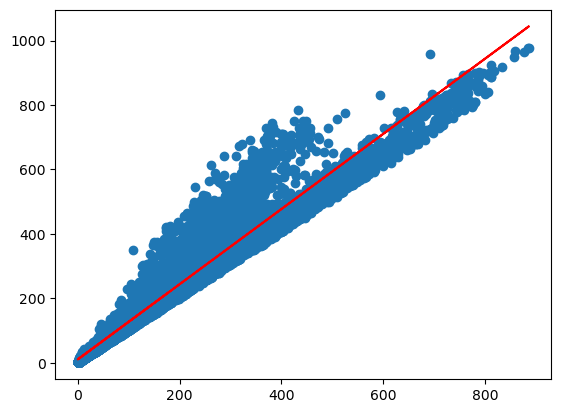

In [34]:
plt.scatter(X_train,y_train)
plt.plot(X_train,10.484+X_train*1.166,'r')
plt.show()

In [36]:
X_test_sm = sm.add_constant(X_test)

y_pred = lr.predict(X_test_sm)
y_pred.head()

6052    597.361308
6250     58.321795
8110    200.665562
7604    152.828722
6356    128.326926
dtype: float64

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#mean squared error
mse=np.sqrt(mean_squared_error(y_test,y_pred))
mse

40.9169343911771

In [40]:
#r-squared value
r2=r2_score(y_test,y_pred)
r2

0.9488895360421342

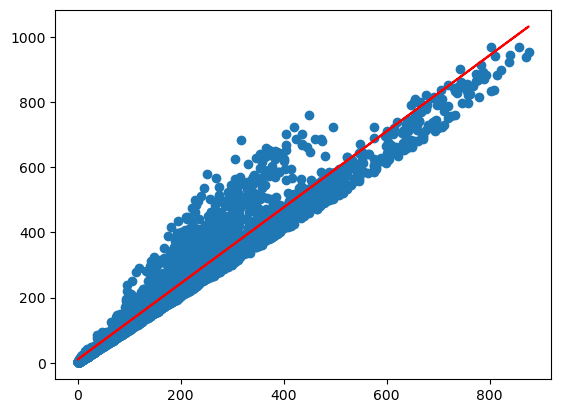

In [42]:
plt.scatter(X_test,y_test)
plt.plot(X_test,10.484+X_test*1.166,'r')
plt.show()